In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt

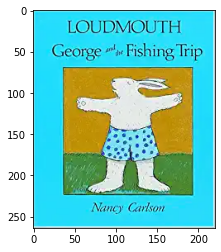

In [2]:
# Read the image
orig_image = cv2.imread('book.png')
plt.imshow(orig_image)

(220, 264, 3)
(110, 132, 3)
(55, 66, 3)


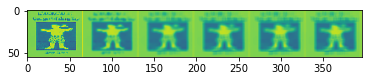

In [8]:
for i in range(3):
    img = orig_image
    row, col, channel = img.shape
    img = cv2.resize(img, (row // (2**i), col // (2**i)))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    result = gray
    print(img.shape)
    
    for j in range(5):        
        smoothed_img = cv2.GaussianBlur(gray, (5,5), 2**j, 2**j)   
        result = cv2.hconcat([result, smoothed_img])         
    plt.imshow(result)